In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from itertools import cycle

In [2]:
os.chdir("..")
print("CWD is now:", os.getcwd()) 

CWD is now: /Users/nabilasiregar/code/emergent-communication


In [3]:
def plot_accuracy_over_epochs(run_dirs):
    """
    Plots mean train and validation accuracy over epochs with std deviation shaded,
    across multiple runs reading from epoch_summary.jsonl files.

    Parameters:
    - run_dirs (dict): Mapping from seed IDs to directories containing 'epoch_summary.jsonl'
    """
    train_acc = {}
    val_acc = {}

    for seed, run_dir in run_dirs.items():
        jsonl_path = os.path.join(run_dir, 'epoch_summary.jsonl')
        with open(jsonl_path, 'r', encoding='utf-8') as f:
            records = [json.loads(line) for line in f]
        df = pd.DataFrame(records).sort_values(['mode', 'epoch'])
        
        # Separate out train and validation
        train_df = df[df['mode'] == 'train'].set_index('epoch')
        val_df = df[df['mode'] == 'validation'].set_index('epoch')
        
        train_acc[seed] = train_df['acc']
        val_acc[seed] = val_df['acc']

    # Combine into DataFrames: rows=epochs, cols=seeds
    train_combined = pd.DataFrame(train_acc)
    val_combined = pd.DataFrame(val_acc)

    # Compute mean and standard deviation
    train_mean = train_combined.mean(axis=1)
    train_std = train_combined.std(axis=1)
    val_mean = val_combined.mean(axis=1)
    val_std = val_combined.std(axis=1)

    plt.figure()
    plt.plot(train_mean.index, train_mean, label='Train Mean Accuracy')
    plt.fill_between(train_mean.index, train_mean - train_std, train_mean + train_std, alpha=0.3)
    plt.plot(val_mean.index, val_mean, label='Test Mean Accuracy')
    plt.fill_between(val_mean.index, val_mean - val_std, val_mean + val_std, alpha=0.3)
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train vs. Test Accuracy')
    plt.legend()
    plt.show()


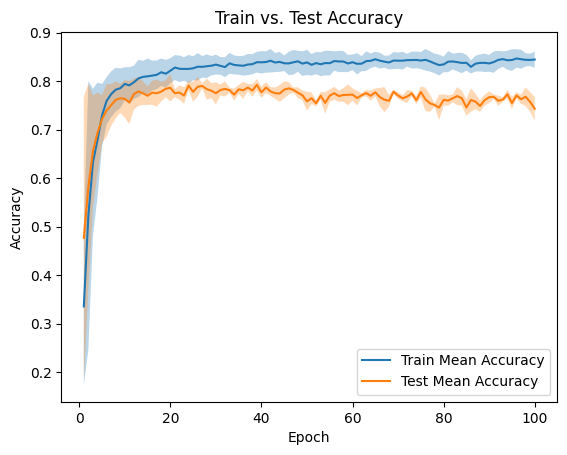

In [ ]:
# BEE, 100 epochs, lr: 0.01, temp: 1.5
run_dirs = {
    42: 'logs/baseline_bee_gs_seed42_20250521_235929',
    2025: 'logs/baseline_bee_gs_seed2025_20250522_000952',
    123: 'logs/baseline_bee_gs_seed123_20250522_001727'
}

plot_accuracy_over_epochs(run_dirs)

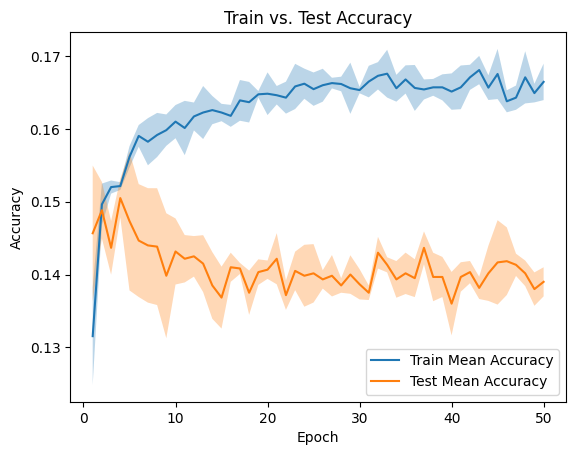

In [ ]:
# HUMAN, 50 epochs, lr: 0.0001, temp: 1.5
run_dirs = {
    42: 'logs/baseline_human_gs_seed42_20250522_003034',
    2025: 'logs/baseline_human_gs_seed2025_20250522_005536',
    123: 'logs/baseline_human_gs_seed123_20250522_011314'
}

plot_accuracy_over_epochs(run_dirs)

In [17]:
def plot_accuracy_over_epochs_for_different_datasets(datasets_runs):
    """
    Plots mean train and test accuracy over epochs (with std shaded)
    for multiple datasets, each run with multiple seeds.

    Parameters:
    - datasets_runs (dict):
        keys = dataset names (str)
        values = dict mapping seed IDs (int or str) to run_dir containing 'epoch_summary.jsonl'
    """
    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

    plt.figure(figsize=(8,6))
    for dataset_name, seed_dirs in datasets_runs.items():
        train_accs = {}
        test_accs  = {}

        # ——— read each seed’s file and build per-seed series ———
        for seed, run_dir in seed_dirs.items():
            path = os.path.join(run_dir, 'epoch_summary.jsonl')
            with open(path, 'r', encoding='utf-8') as f:
                recs = [json.loads(line) for line in f]
            df = pd.DataFrame(recs).sort_values(['mode','epoch'])

            # use df['mode'] not df.mode
            train_series = df[df['mode']=='train'].set_index('epoch')['acc']
            test_series  = df[df['mode']=='validation'].set_index('epoch')['acc']

            train_accs[seed] = train_series
            test_accs[seed]   = test_series

        # ——— aggregate over seeds ———
        train_df = pd.DataFrame(train_accs)
        test_df  = pd.DataFrame(test_accs)

        t_mean = train_df.mean(axis=1)
        t_std  = train_df.std(axis=1)
        v_mean = test_df.mean(axis=1)
        v_std  = test_df.std(axis=1)

        train_color = next(colors)
        test_color  = next(colors)


        # plot train mean ± std
        plt.plot(
            t_mean.index, t_mean,
            label=f'{dataset_name} train',
            color=train_color,
            linewidth=2,
        )
        plt.fill_between(
            t_mean.index,
            t_mean - t_std,
            t_mean + t_std,
            color=train_color,
            alpha=0.2
        )

        # plot test mean ± std
        plt.plot(
            v_mean.index, v_mean,
            label=f'{dataset_name} test',
            color=test_color,
            linewidth=2,
            linestyle='--'
        )
        plt.fill_between(
            v_mean.index,
            v_mean - v_std,
            v_mean + v_std,
            color=test_color,
            alpha=0.2
        )

    plt.xlabel('Epoch', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('Train vs. Test Accuracy when varying max_len', fontsize=16)
    plt.legend(loc='best', fontsize='medium')
    plt.tight_layout()
    plt.show()

In [33]:
run_dirs = {
    "TotalNodes:10": {
        42: 'logs/baseline_human_gs_seed42_20250522_003034',
        2025: 'logs/baseline_human_gs_seed2025_20250522_005536',
        123: 'logs/baseline_human_gs_seed123_20250522_011314'
    },
    "TotalNodes:5": {
        42: "logs/totalnodes:5_baseline_human_gs_seed42_20250522_095800",
        2025: "logs/totalnodes:5_baseline_human_gs_seed2025_20250522_101617"
    }
}

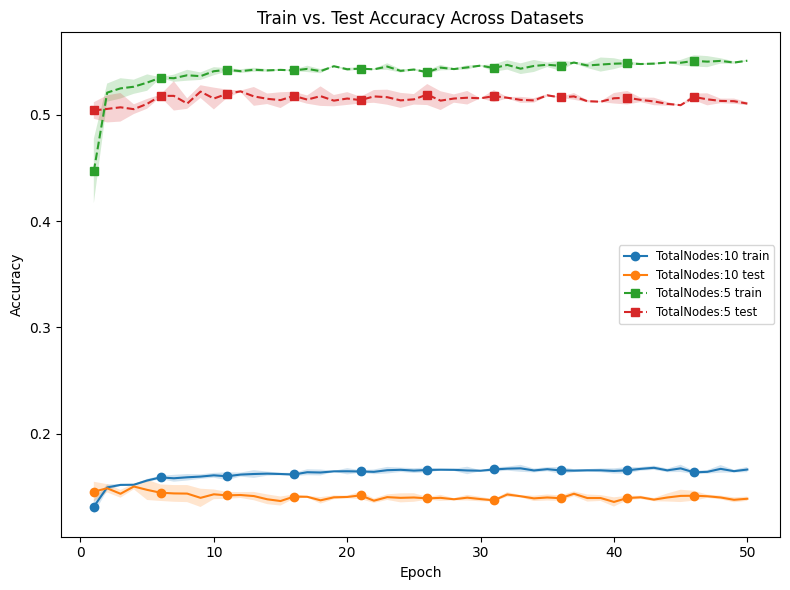

In [34]:
plot_accuracy_over_epochs_for_different_datasets(run_dirs)

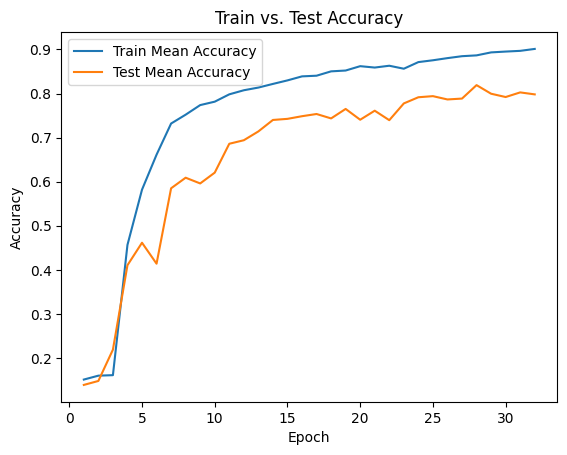

In [39]:
tuned_dirs = {
    42: 'logs/human_gs_seed42_20250522_111306'
}

plot_accuracy_over_epochs(tuned_dirs)

In [19]:
run_dirs = {
    "2": {
        42: 'logs/vary_max_len/2_human_gs_seed42_20250528_045212'
    },
    "4": {
        42: "logs/vary_max_len/4_human_gs_seed42_20250528_070130"
    },
    "6": {
        42: "logs/vary_max_len/6_human_gs_seed42_20250528_023615"
    },
    "8": {
        42: "logs/vary_max_len/8_human_gs_seed42_20250528_073737"
    },
    "10": {
        42: "logs/vary_max_len/10_human_gs_seed42_20250528_003124"
    }
}

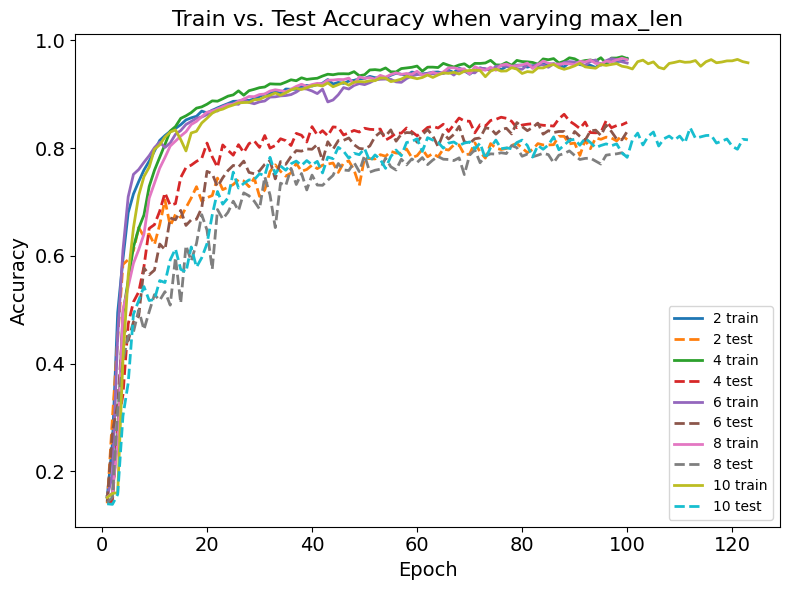

In [20]:
plot_accuracy_over_epochs_for_different_datasets(run_dirs)